# SVM

* traindata의 마진을 최대화 하는 모델
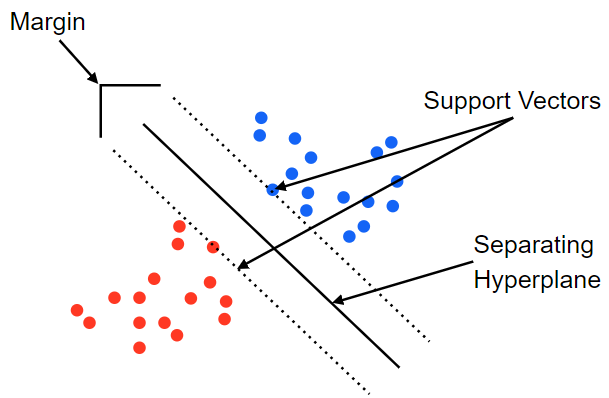

* margin : 결정 경계와 support Vector와의 거리

In [2]:
# 타이타닉 train데이터와 test데이터 불러오기
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 데이터 타입 변경과 nan 값 체우기
train_data.loc[train_data['Sex']=='male', 'Sex']=0
train_data.loc[train_data['Sex']=='female','Sex']=1
test_data.loc[test_data['Sex']=='male','Sex']=0
test_data.loc[test_data['Sex']=='female','Sex']=1

In [5]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [8]:
X= train_data[['Pclass','Age','SibSp','Fare']]
Y = train_data['Survived']
test_data = test_data[['Pclass','Age','SibSp','Fare',]]

In [10]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [11]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [28]:
model = svm.SVC(gamma=0.001, C=100.0)
# c = 모델에 걸어줄 규제  => 높을수록 오버피팅 낮을수록 언더피팅이 될 가능성이 높기 때문에 적당한 값을 찾아야함
# gamma = 커널폭의 역수

In [29]:
model = model.fit(X_train,Y_train)

In [30]:
result = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
print(accuracy_score(result,y_test))

0.6828358208955224


In [78]:
model = svm.SVC(gamma=0.001, C=500.0)
# c = 500으로 변경 

In [79]:
model = model.fit(X_train,Y_train)

In [80]:
result = model.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
print(accuracy_score(result,y_test))

0.6716417910447762
